In [2]:
import pandas as pd
import os
import sys
sys.path.append('/home/brian/Dropbox/Python')
from gittislab import dataloc
import matplotlib.pyplot as plt
import math  

def calculateDistance(x1,y1,x2,y2):  
     dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)  
     return dist  
from scipy.spatial.distance import cdist, squareform

In [32]:
path='/home/brian/Dropbox/Gittis Lab Data/OptoBehavior'
inc=[] #limited subset test case
exc=['exclude']
filetype='.h5'

fn=dataloc.gen_paths_recurse(path,inc,exc,filetype)
for f in fn:
    print(f)

/home/brian/Dropbox/Gittis Lab Data/OptoBehavior/SNr_and_Str/Naive/D1_D1/Ai35_Ai35/Left/5x30/AG5313_5_BI01022020/iteration_10_dlc_analyze.h5
/home/brian/Dropbox/Gittis Lab Data/OptoBehavior/GPe_and_Str/Naive/GAD2_A2A/Caspase_ChR2/Bilateral/zone_1/AG5025_3_BI092319/iteration_10_dlc_analyze.h5
/home/brian/Dropbox/Gittis Lab Data/OptoBehavior/GPe_and_Str/Naive/GAD2_A2A/Caspase_ChR2/Bilateral/zone_1/AG5025_1_BI092319/iteration_10_dlc_analyze.h5
/home/brian/Dropbox/Gittis Lab Data/OptoBehavior/GPe_and_Str/Naive/GAD2_A2A/Caspase_ChR2/Bilateral/zone_1/AG5025_2_BI092319/iteration_10_dlc_analyze.h5
/home/brian/Dropbox/Gittis Lab Data/OptoBehavior/Str/Naive/D2SP/ChR2/Bilateral/5x30/AG4482_6_BI090419/iteration_10_dlc_analyze.h5
/home/brian/Dropbox/Gittis Lab Data/OptoBehavior/Str/Naive/D1/Caspase_hSyn_ChR2/Left/5x30/AG3689_4_BI032519/iteration_10_dlc_analyze.h5
/home/brian/Dropbox/Gittis Lab Data/OptoBehavior/Str/Naive/D1/Arch/Left/5x30/AG4924_3_BI101819/iteration_10_dlc_analyze.h5
/home/brian/Dr

{}

In [40]:
demo='/home/brian/Dropbox/Gittis Lab Data/OptoBehavior/Str/Naive/D1/Ai35/Bilateral/10x30/AG4074_7_BI102518/iteration_10_dlc_analyze.h5'
df=pd.read_hdf(demo)



[52.02213566016854, 51.86234161476354, 50.44338114549084, 47.862847699000795, 48.23864776428466, 48.510931645164035, 47.67687841649143, 47.27155520073067, 46.551164974128554, 43.94184072575259]
468.79604721069336


(0, 60)

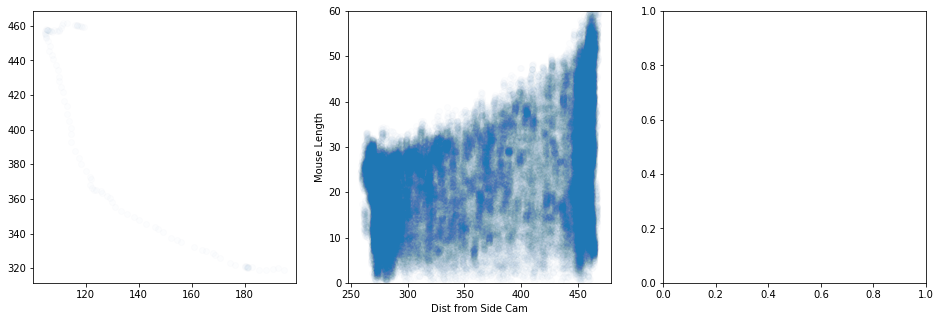

In [42]:
#Plot side-head -> tail angle vs. body_center y
exp=df.columns[0][0]

#for c in df.columns:
    #print(c[1] +'_' + c[2])
x=df[(exp,'top_body_center','x')].values
y=df[(exp,'top_body_center','y')].values
y= 480 - y

x1=df[(exp,'side_head','x')].values
y1=df[(exp,'side_head','y')].values
x2=df[(exp,'side_tail_base','x')].values
y2=df[(exp,'side_tail_base','y')].values

mouse_length=[]
for i,r in enumerate(x1):
    mouse_length.append(calculateDistance(x1[i],y1[i],x2[i],y2[i]))
print(mouse_length[0:10])
print(max(y))

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(16,5))
ax[0].scatter(x[0:100],y[0:100],alpha=0.01)
ax[1].scatter(y,mouse_length,alpha=0.01)
ax[1].set_ylabel('Mouse Length')
ax[1].set_xlabel('Dist from Side Cam')
ax[1].set_ylim([0,60])

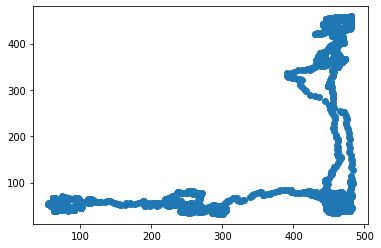